### Obtaining the most relevant genes from the machine learning classification methods 

* After obtaining the machine learning classification outputs from the random forest, support vector machine, and Logistic regression, I performed a random forest feature importance to find out what genes are the most relevant in the models'prediction, having the greatest impact in the output.
* These genes, identify by random forest, might have a biological relevance in the context of breast cancer.


In [28]:
# Loading libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
# Loading the previously trained and testing data used to perfomed machine learning classification
X_train = np.load('C:/Users/amade/Documents/UofSC/Bioinformatics/Github/Machine learning in genomics/tcga_X_train.npy',allow_pickle=True)
y_train =np.load('C:/Users/amade/Documents/UofSC/Bioinformatics/Github/Machine learning in genomics/tcga_y_train.npy',allow_pickle=True)

In [4]:
# Initializing and training the Random Forest model
# Seed is set up to 72 to ensure reproducibility
random_forest = RandomForestClassifier(random_state=72)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=72)

In [5]:
# Obtaining feature importance ( gene importance ) in the dataset
feature_importances = random_forest.feature_importances_

In [7]:
# Creating a DataFrame for visualization purposes
feature_names = pd.read_csv('C:/Users/amade/Documents/UofSC/Bioinformatics/Github/Machine learning in genomics/tcga_brca_gene_expression.csv').columns[1:-1]
# Establishing the dataframe and showing the most 20 sorted genes 
importance_df = pd.DataFrame({'Gene': feature_names, 'Gene_importance': feature_importances})
importance_df = importance_df.sort_values(by='Gene_importance', ascending=False).head(20) 
print(importance_df)

                     Gene  Gene_importance
17142  ENSG00000196549.12         0.018871
26009   ENSG00000225398.3         0.017561
12373   ENSG00000168497.5         0.014917
11511  ENSG00000165072.10         0.011535
46281   ENSG00000260947.1         0.011518
14951  ENSG00000180914.10         0.010885
16529   ENSG00000187758.8         0.010615
3517   ENSG00000108381.11         0.010606
54464   ENSG00000277737.3         0.010598
5433    ENSG00000123975.5         0.010200
2140   ENSG00000099953.10         0.009663
9428   ENSG00000151623.15         0.009224
14215   ENSG00000177098.9         0.009084
64     ENSG00000004846.16         0.008974
11324  ENSG00000164330.17         0.008828
16887   ENSG00000189134.4         0.008804
6230   ENSG00000130226.17         0.008559
967    ENSG00000066279.18         0.008216
8741   ENSG00000145777.15         0.007936
39383   ENSG00000250934.2         0.007838


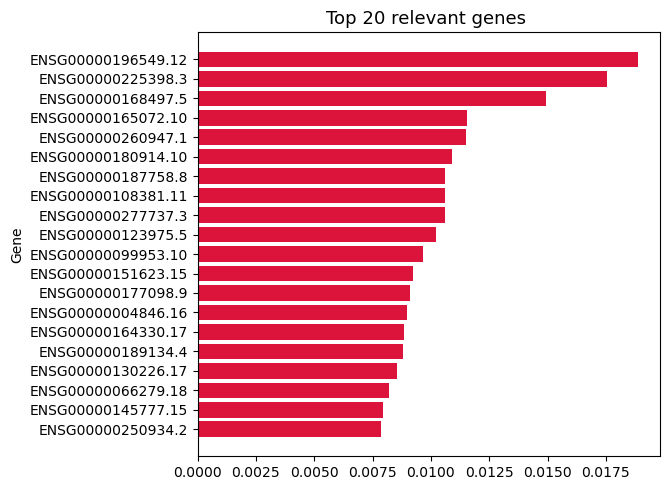

In [19]:
#Plotting the 20 most relevant genes from the classification methods.
plt.figure(figsize=(6.8, 5))
plt.barh(importance_df['Gene'], importance_df['Gene_importance'], color='crimson')
#plt.xlabel('Gene_relevance')
plt.ylabel('Gene')
plt.title('Top 20 relevant genes ',size=13)
plt.gca().invert_yaxis()
plt.grid(False)
plt.tight_layout()
plt.show()

In [22]:
#pip install gseapy biopython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 660.6 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/2.8 MB 1.8 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.8 MB 4.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.7/2.8 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Performing a pathway analysis on the 20 most relevant genes in the dataset

In [148]:
# Importing the libraries 
from sanbomics.tools import id_map
from Bio import Entrez
import gseapy as gp
from gseapy import barplot, dotplot

In [149]:
# Creating a mapper for human' genes identification 
mapper = id_map(species="human")

In [150]:
# Calling the dataset
importance_df.head(5)
# Setting up the Gene column as index 
genes = importance_df.set_index("Gene")

In [151]:
# Deleting the gene identifiers 
genes.index = genes.index.str.split('.').str[0]
# Adding the ID symbol of the genes 
genes["Symbol"]=genes.index.map(mapper.mapper)
print(genes)

                 Gene_importance      Symbol
Gene                                        
ENSG00000196549         0.018871         MME
ENSG00000225398         0.017561      PGM5P4
ENSG00000168497         0.014917      CAVIN2
ENSG00000165072         0.011535      MAMDC2
ENSG00000260947         0.011518  AL356489.2
ENSG00000180914         0.010885        OXTR
ENSG00000187758         0.010615       ADH1A
ENSG00000108381         0.010606        ASPA
ENSG00000277737         0.010598         NaN
ENSG00000123975         0.010200        CKS2
ENSG00000099953         0.009663       MMP11
ENSG00000151623         0.009224       NR3C2
ENSG00000177098         0.009084       SCN4B
ENSG00000004846         0.008974       ABCB5
ENSG00000164330         0.008828        EBF1
ENSG00000189134         0.008804       NKAPL
ENSG00000130226         0.008559        DPP6
ENSG00000066279         0.008216        ASPM
ENSG00000145777         0.007936        TSLP
ENSG00000250934         0.007838  AC016924.1


In [152]:
# Converting dataframe or to list
#glist = top_genes.squeeze().str.strip().to_list()
#print(glist[:])
# Obtaining the symbol column of the 20 most relevant genes 
gene_symbol_df = genes[['Symbol']].reset_index(drop=True)
gene_symbol_df.columns =[0]
# Dropping nan values 
top_genes = gene_symbol_df.dropna()   

In [154]:
# Getting human libraries
human = gp.get_library_name(organism='Human')
human[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [176]:
# Pathway analysis
# Pathways chosen are : GO_Biological_Process_2023, KEGG_2021_Human
enr = gp.enrichr(gene_list=top_genes, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2023','GO_Molecular_Function_2023'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [177]:
# Showing the results
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Cellular Response To Organic Substance (GO:007...,2/82,0.002714,0.06766,0,0,29.266176,172.945562,OXTR;MME
1,GO_Biological_Process_2023,Bradykinin Catabolic Process (GO:0010815),1/5,0.004741,0.06766,0,0,277.458333,1484.797350,MME
2,GO_Biological_Process_2023,AV Node Cell Action Potential (GO:0086016),1/6,0.005687,0.06766,0,0,221.955556,1147.410799,SCN4B
3,GO_Biological_Process_2023,Positive Regulation Of Interleukin-5 Productio...,1/6,0.005687,0.06766,0,0,221.955556,1147.410799,TSLP
4,GO_Biological_Process_2023,Positive Regulation Of Mast Cell Activation (G...,1/6,0.005687,0.06766,0,0,221.955556,1147.410799,TSLP


C:\Users\amade\anacon\Lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


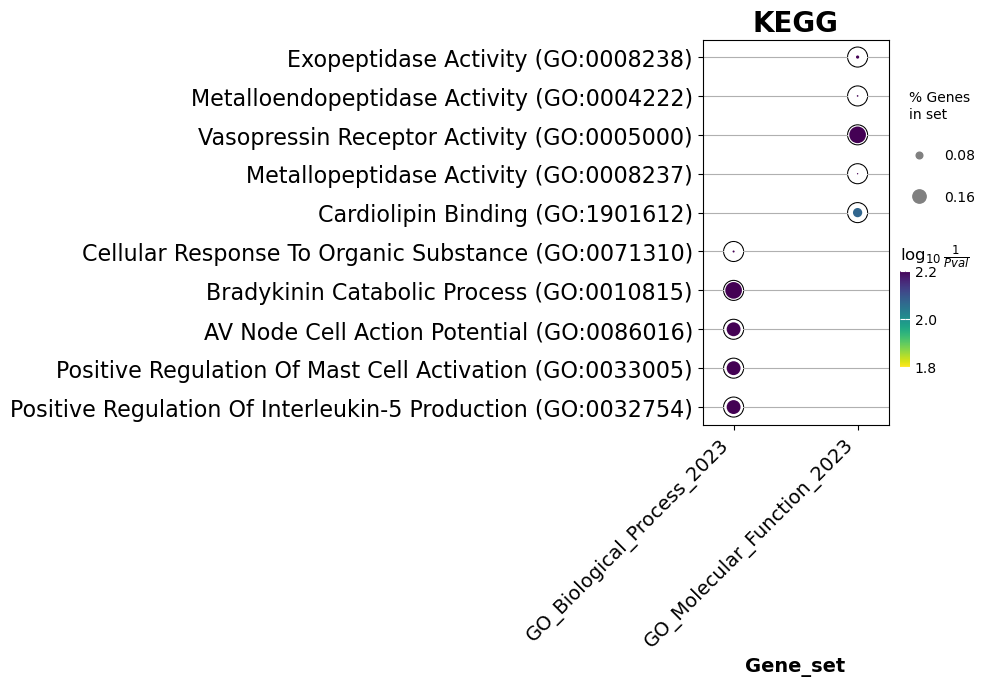

In [179]:
# Plotting the results 
# Categorical scatterplot
ax = dotplot(enr.results,
              column="P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )



C:\Users\amade\anacon\Lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


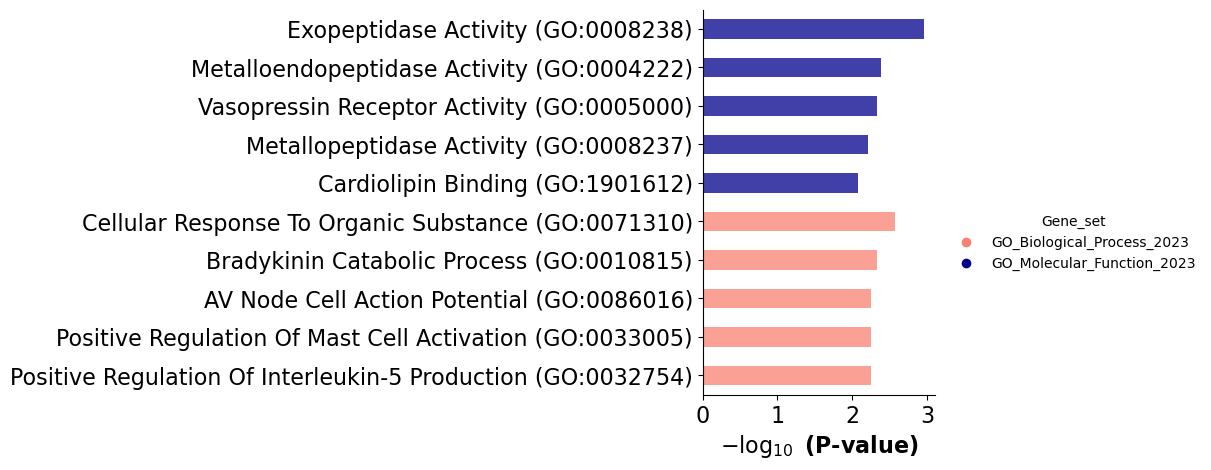

In [183]:
# Categorical barplot
ax = barplot(enr.results,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['green', 'darkblue'] # set colors for group
              color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )